In [1]:
import time
import pandas as pd
import seaborn as sns
from numpy import mean
from datetime import datetime
import dataframe_image as dfi
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format = 'retina'

In [2]:
csvPath = 'YouTubeDataset_withChannelElapsed.csv'
df = pd.read_csv(csvPath)
orgDF = df.drop_duplicates(subset=['videoId'])

In [3]:
data = orgDF.set_index(['videoId']).drop(['index', 'likes/dislikes', 'channelId'], axis=1)

idx = data[(data['totalviews/channelelapsedtime'] == -1) | \
           (data['videoCategoryId'] == -1) | \
           (data['channelViewCount'] == -1) | \
           (data['likes/subscriber'] == -1) | \
           (data['views/subscribers'] == -1) | \
           (data['videoCount'] == -1) | \
           (data['subscriberCount'] == -1) | \
           (data['dislikes/views'] == -1) | \
           (data['channelelapsedtime'] == -1) | \
           (data['comments/subscriber'] == -1) | \
           (data['likes/views'] == -1) | \
           (data['channelCommentCount'] == -1) | \
           (data['videoViewCount'] == -1) | \
           (data['comments/views'] == -1) | \
           (data['totvideos/videocount'] == -1) | \
           (data['elapsedtime'] == -1) | \
           (data['videoLikeCount'] == -1) | \
           (data['videoDislikeCount'] == -1) | \
           (data['dislikes/subscriber'] == -1) | \
           (data['totviews/totsubs'] == -1) | \
           (data['views/elapsedtime'] == -1) | \
           (data['videoPublished'] == -1) | \
           (data['VideoCommentCount'] == -1)].index
data = data.drop(idx, axis=0)

data['videoPublished'] = data['videoPublished'].apply(lambda x: int(time.mktime(datetime.strptime(x[:10], "%Y-%m-%d").timetuple())))

In [4]:
normalizedDF_minmax = (data - data.min()) / (data.max() - data.min())  # 0 ~ 1
normalizedDF_mean = (data - data.mean()) / data.std()
normalizedDF = normalizedDF_minmax
normalizedDF_corr = normalizedDF.corr()

<AxesSubplot: >

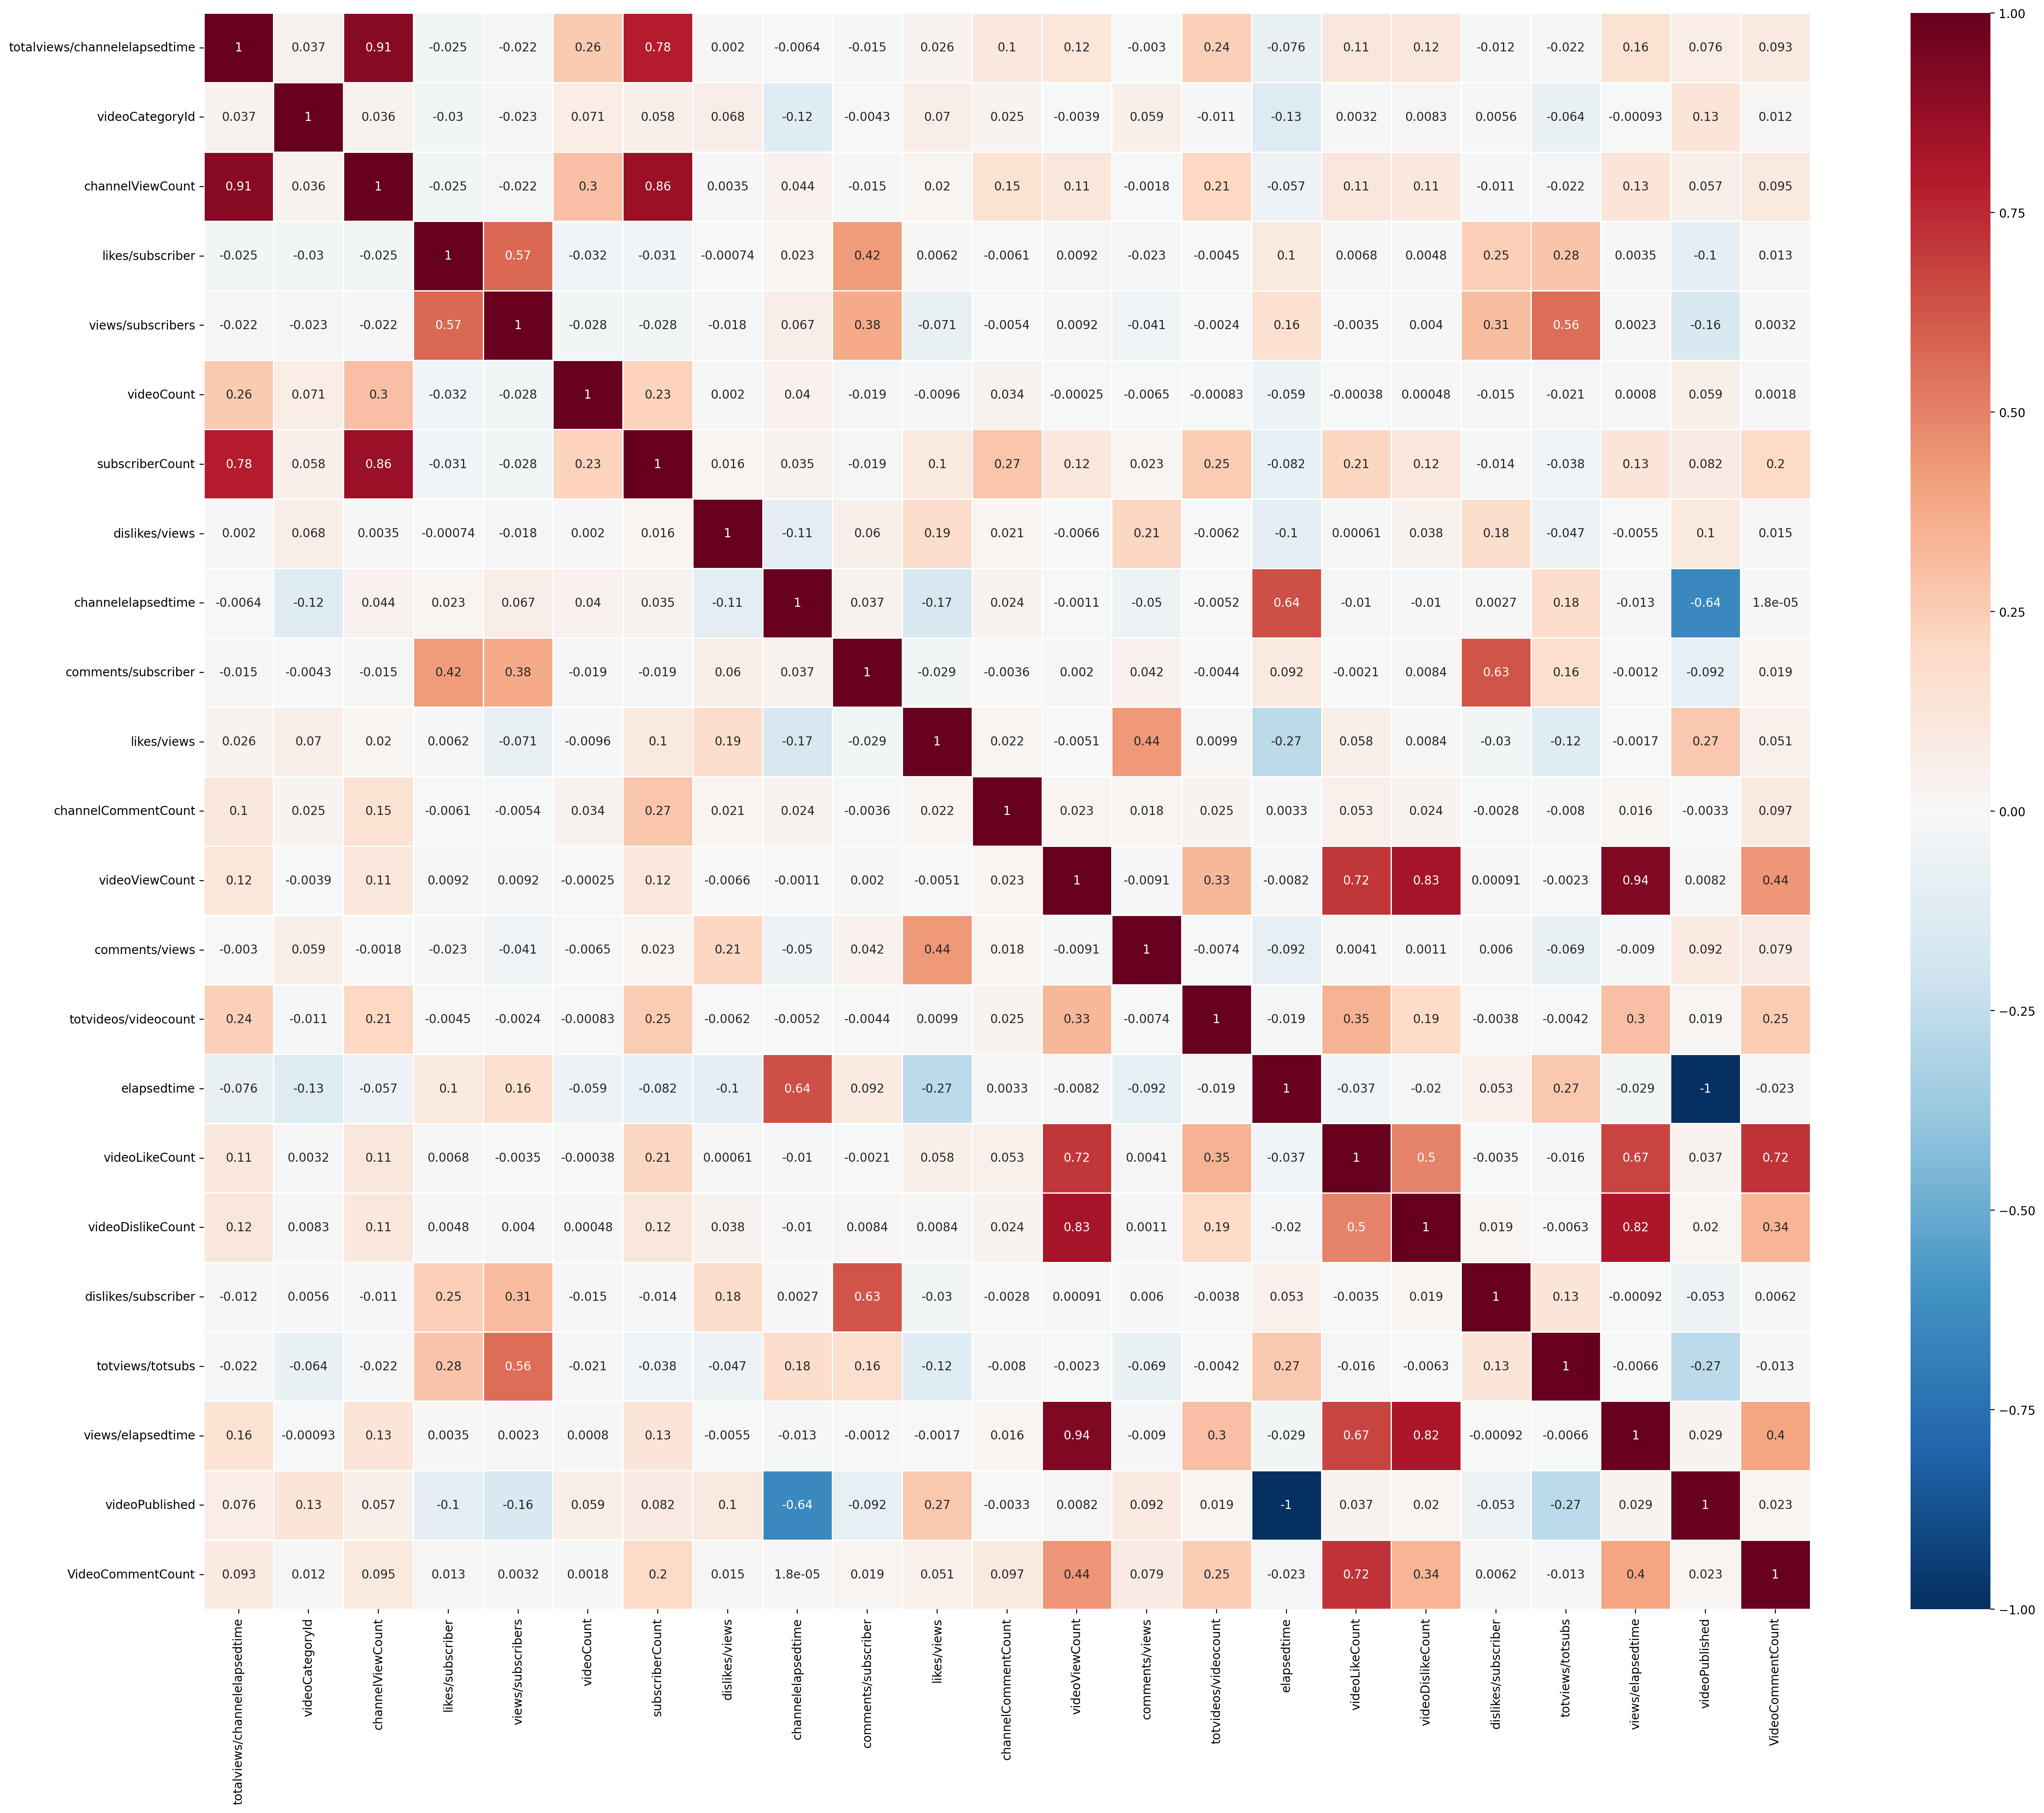

In [105]:
plt.figure(figsize=(30, 24))
sns.heatmap(normalizedDF_corr, cmap='RdBu_r', linewidths=0.5, vmin=-1, vmax=1, annot=True)

# 新增影片對應分類，以分類分群

In [5]:
videoCategory = [['2', 'Autos & Vehicles'], ['1', 'Film & Animation'], ['10', 'Music'], ['15', 'Pets & Animals'], ['17', 'Sports'], ['18', 'Short Movies'], ['19', 'Travel & Events'], ['20', 'Gaming'], ['21', 'Videoblogging'], ['22', 'People & Blogs'], ['23', 'Comedy'], ['24', 'Entertainment'], ['25', 'News & Politics'], ['26', 'Howto & Style'], ['27', 'Education'], ['28', 'Science & Technology'], ['29', 'Nonprofits & Activism'], ['30', 'Movies'], ['31', 'Anime/Animation'], ['32', 'Action/Adventure'], ['33', 'Classics'], ['34', 'Comedy'], ['35', 'Documentary'], ['36', 'Drama'], ['37', 'Family'], ['38', 'Foreign'], ['39', 'Horror'], ['40', 'Sci-Fi/Fantasy'], ['41', 'Thriller'], ['42', 'Shorts'], ['43', 'Shows'], ['44', 'Trailers']]
for item in videoCategory:
    (data.loc[data['videoCategoryId'] == int(item[0]), 'videoCategory']) = item[1]

In [6]:
dataGroup = data.groupby('videoCategory')

In [20]:
channlCount = {}
for category in dataGroup.groups.keys():
    channlCount[category] = len(dataGroup.get_group(category))
#channlCount

{'Autos & Vehicles': 32005,
 'Comedy': 11798,
 'Education': 14785,
 'Entertainment': 66994,
 'Film & Animation': 23906,
 'Gaming': 66975,
 'Howto & Style': 29806,
 'Movies': 3,
 'Music': 101974,
 'News & Politics': 8692,
 'Nonprofits & Activism': 3214,
 'People & Blogs': 63093,
 'Pets & Animals': 9141,
 'Science & Technology': 19195,
 'Shows': 1530,
 'Sports': 54197,
 'Trailers': 34,
 'Travel & Events': 14219}

In [7]:
dataGroupMean = dataGroup.mean()
dataGroupMean = dataGroupMean.drop(['videoCategoryId', 'videoPublished'], axis=1)

In [8]:
dataGroupMean['channelViewCount'] = dataGroupMean['channelViewCount'].astype(int)
dataGroupMean['subscriberCount'] = dataGroupMean['subscriberCount'].astype(int)

In [185]:
df = pd.DataFrame({
    'VideoCategory': list(dataGroupMean['subscriberCount'].index) + list(dataGroupMean['subscriberCount'].index),
    'Frequency': list(dataGroupMean['subscriberCount'].values) + list(dataGroupMean['videoViewCount'].values),
    'Category': ['subscriberCount' for _ in range(len(dataGroupMean['subscriberCount']))] + ['videoViewCount' for _ in range(len(dataGroupMean['subscriberCount']))]
    })

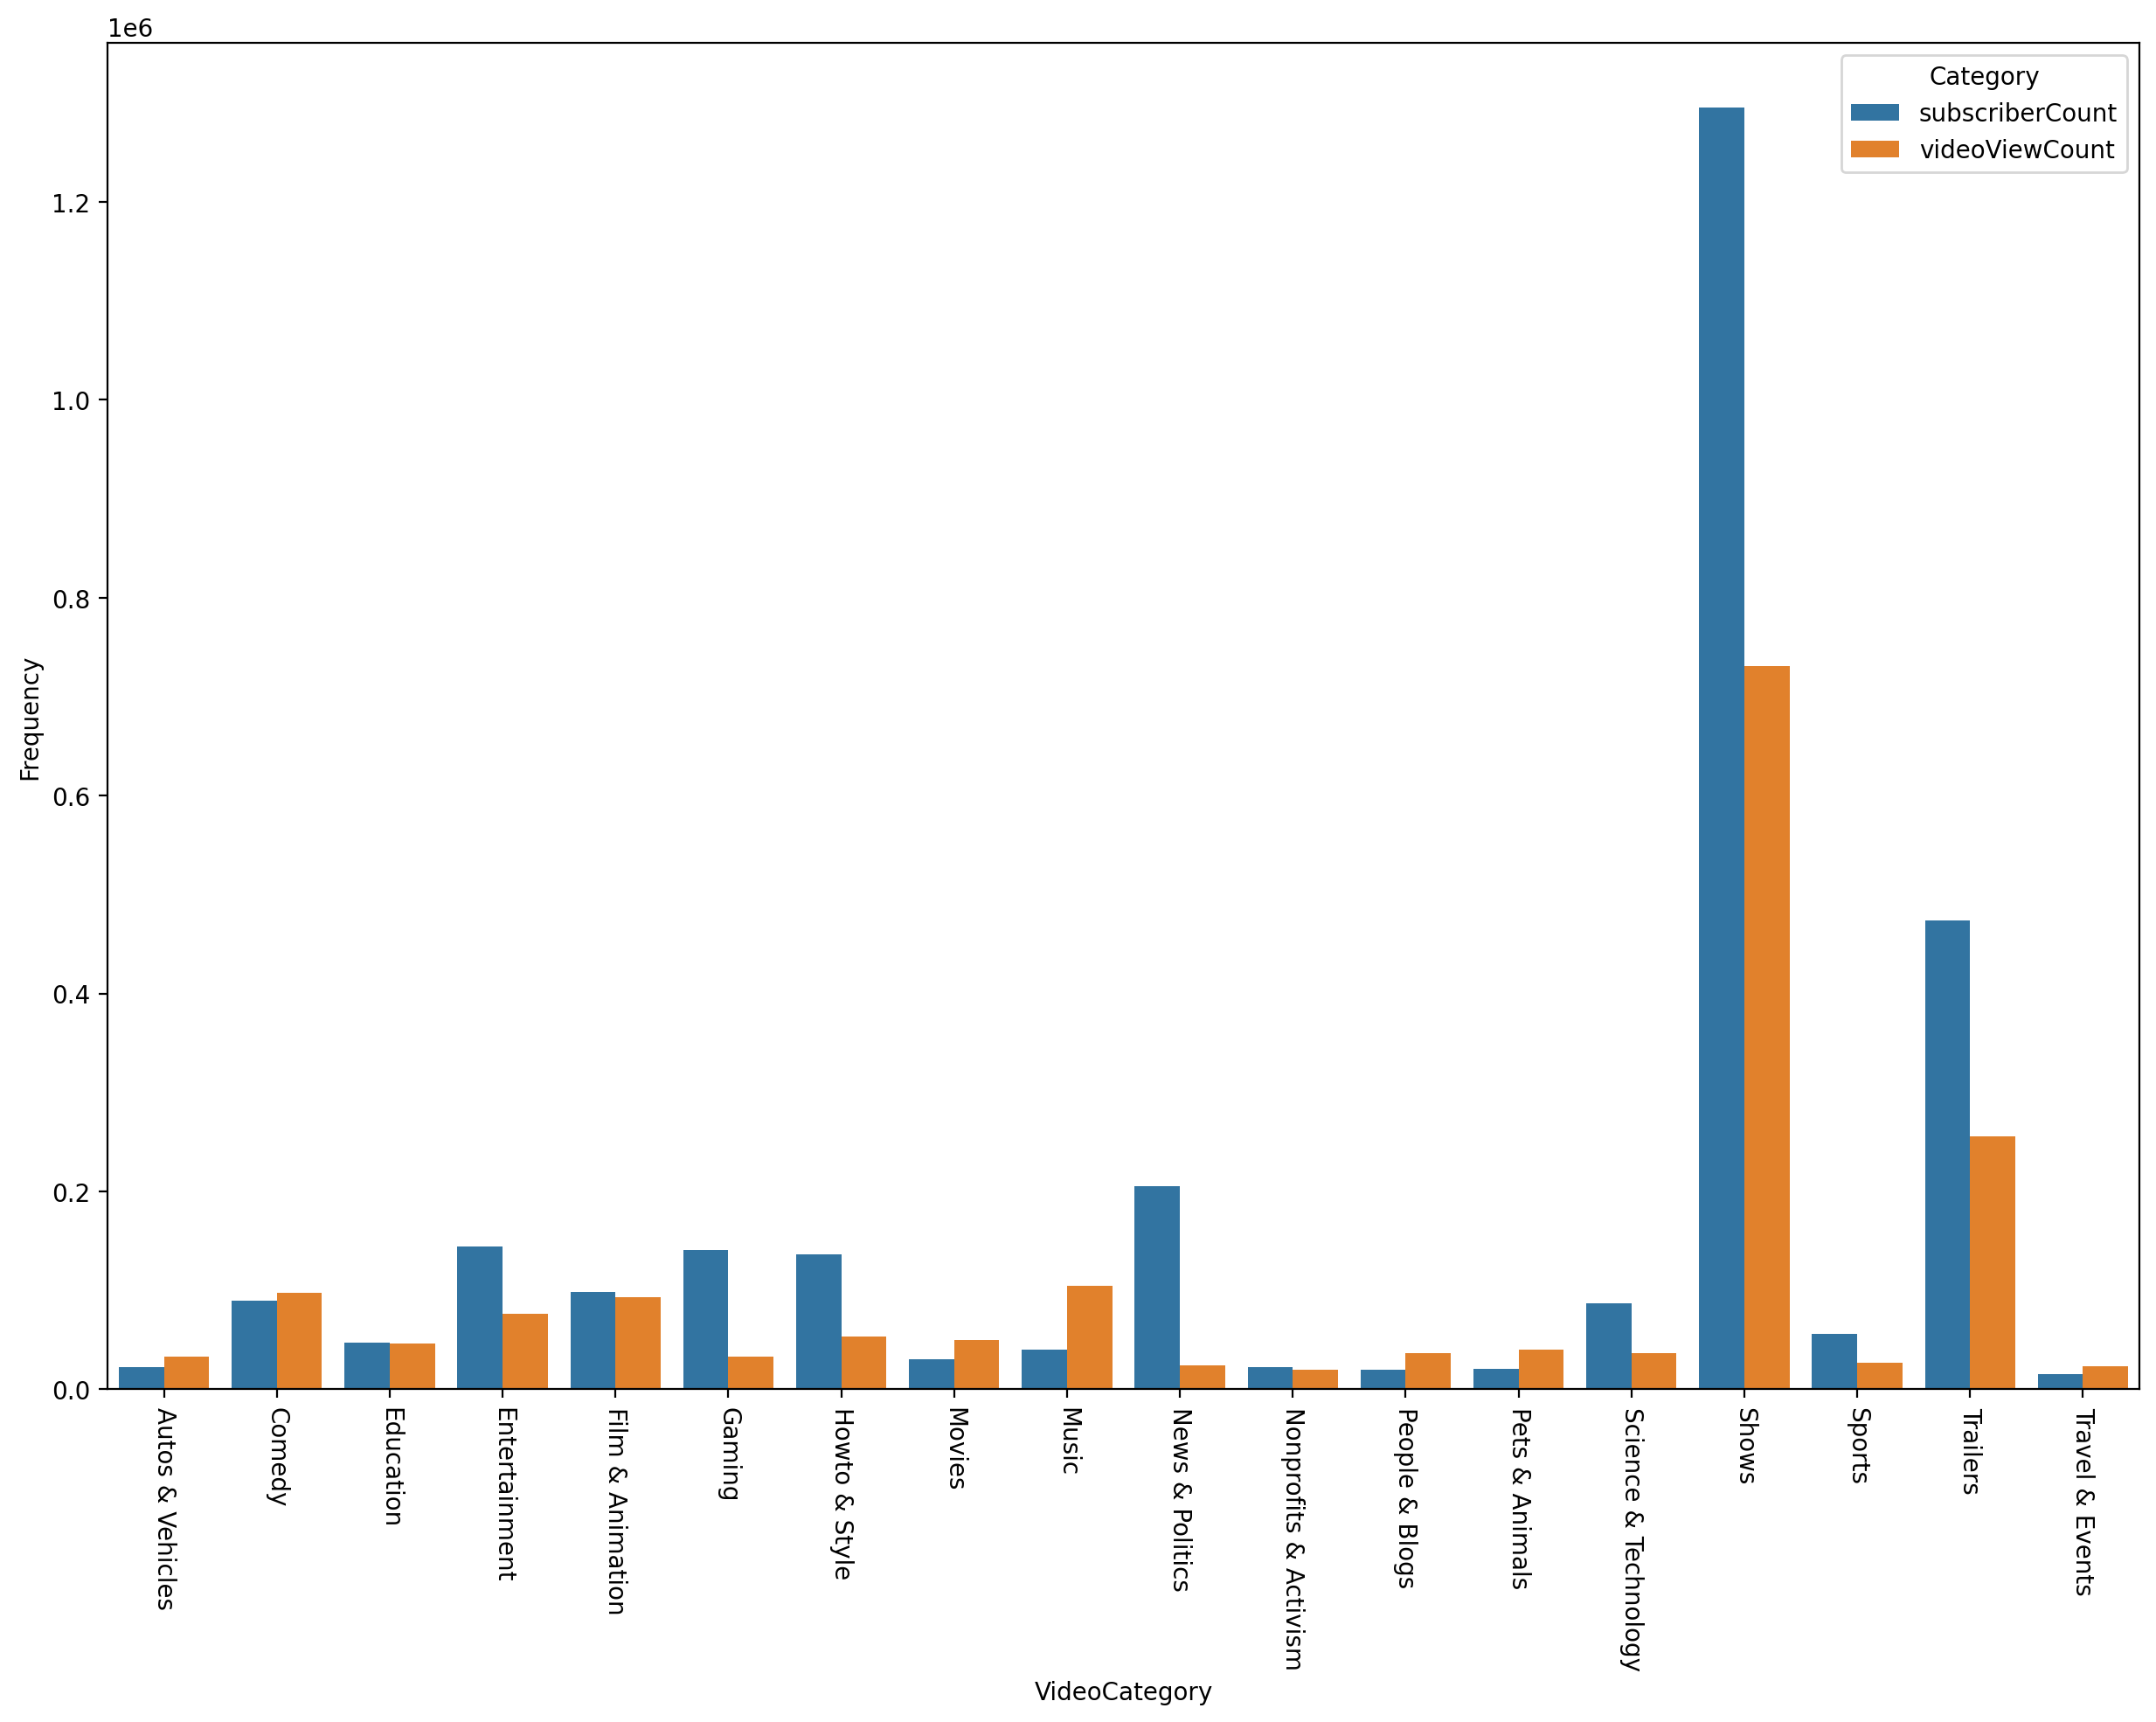

In [186]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='VideoCategory', y='Frequency', data=df, hue=('Category'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
plt.show()

In [187]:
dataGroupMean

totalviews/channelelapsedtime  channelViewCount  \
videoCategory                                                            
Autos & Vehicles                          178.025700          13300960   
Comedy                                    553.572827          39829779   
Education                                 352.725679          18914525   
Entertainment                            1665.493153         109390783   
Film & Animation                         1331.849644          92424156   
Gaming                                    800.392963          48040093   
Howto & Style                             608.672775          44131968   
Movies                                    481.720090          18607560   
Music                                     446.009839          28345651   
News & Politics                          2282.610049         171961082   
Nonprofits & Activism                     133.933574           8628679   
People & Blogs                            173.829994           8330215   
Pets & Animals                            163.143700          12101395   
Science & Technology                      392.253917          28254848   
Shows                                   13174.132505         921530762   
Sports                                    400.282092          33092645   
Trailers                                 3468.303807         251803724   
Travel & Events                           136.415563          10113005   

                       likes/subscriber  views/subscribers    videoCount  \
videoCategory                                                              
Autos & Vehicles               0.521228         455.540829    733.891486   
Comedy                         1.440226         657.367281    319.046110   
Education                      0.389159         200.586862    543.754413   
Entertainment                  0.604275         326.934004   2026.356913   
Film & Animation               0.902072         376.707017    527.390906   
Gaming                         0.356070         159.804143   1037.595431   
Howto & Style                  0.233666         161.260496   1156.439911   
Movies                         0.040826           4.747966    166.000000   
Music                          0.807208         302.016693    400.061123   
News & Politics                0.264378         145.027197  17927.325932   
Nonprofits & Activism          0.581184         232.097075    799.449907   
People & Blogs                 0.972005         436.376407    301.990791   
Pets & Animals                 0.791123         477.506571    507.970791   
Science & Technology           0.299208         220.489531    828.258974   
Shows                          0.005847           1.161706  11826.373856   
Sports                         0.643481         398.419999   1357.363895   
Trailers                       0.003610           2.152554   3172.382353   
Travel & Events                0.546567         394.117423    530.099515   

                       subscriberCount  dislikes/views  channelelapsedtime  \
videoCategory                                                                
Autos & Vehicles                 22468        0.000312        73506.194688   
Comedy                           89311        0.000818        71192.170792   
Education                        47331        0.000462        67297.393169   
Entertainment                   144098        0.000513        71290.535555   
Film & Animation                 98610        0.000450        69619.405421   
Gaming                          140468        0.001111        62380.993669   
Howto & Style                   136379        0.000628        64588.443501   
Movies                           30446        0.000250        54536.000000   
Music                            40427        0.000361        72150.904466   
News & Politics                 204968        0.000593        69191.493097   
Nonprofits & Activism            22074        0.000420        67610.482887   
People 

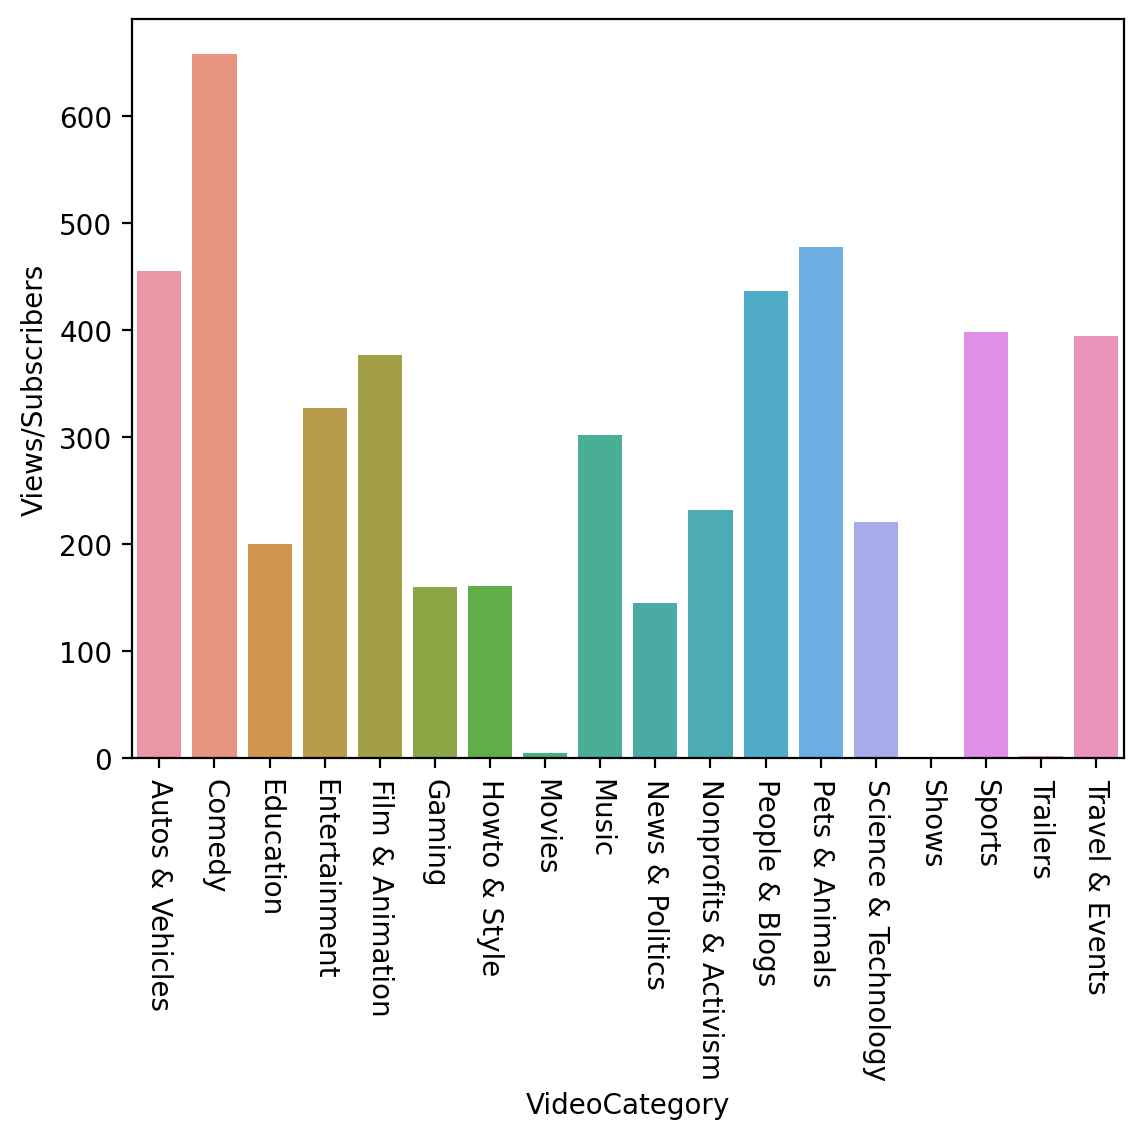

In [11]:
df = pd.DataFrame({
    'VideoCategory': list(dataGroupMean['subscriberCount'].index),
    'Views/Subscribers': list(dataGroupMean['views/subscribers'].values)
    })
#plt.figure(figsize=(15, 10))
ax = sns.barplot(x='VideoCategory', y='Views/Subscribers', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
plt.show()

# attributes 的關係

In [97]:
def draw_scatter(data, key1, key2):
    key1_minmax = (data[key1] - data[key1].min()) / (data[key1].max() - data[key1].min())  # 0 ~ 1
    key2_minmax = (data[key2] - data[key2].min()) / (data[key2].max() - data[key2].min())  # 0 ~ 1
    plt.scatter(list(key1_minmax), list(key2_minmax), s=5, c='red')
    plt.xlabel(key1)
    plt.ylabel(key2)
    plt.show()

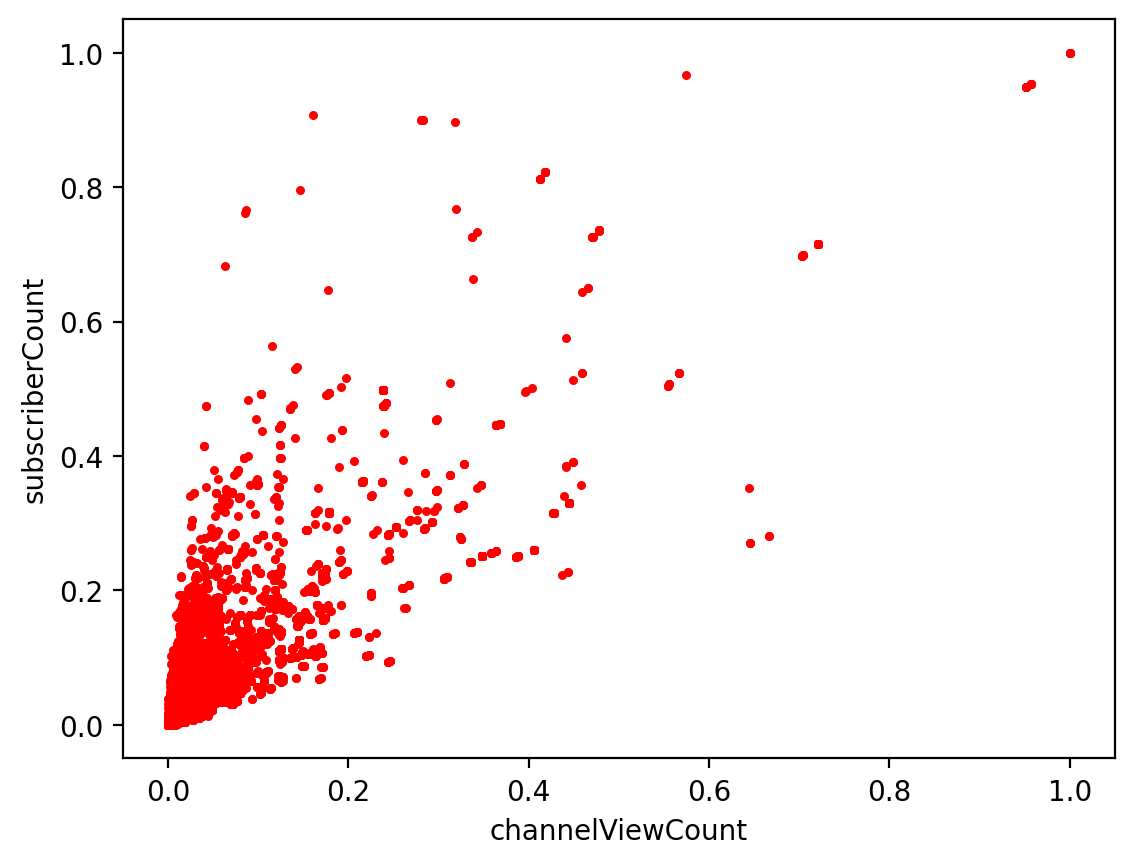

In [98]:
draw_scatter(data, 'channelViewCount', 'subscriberCount')

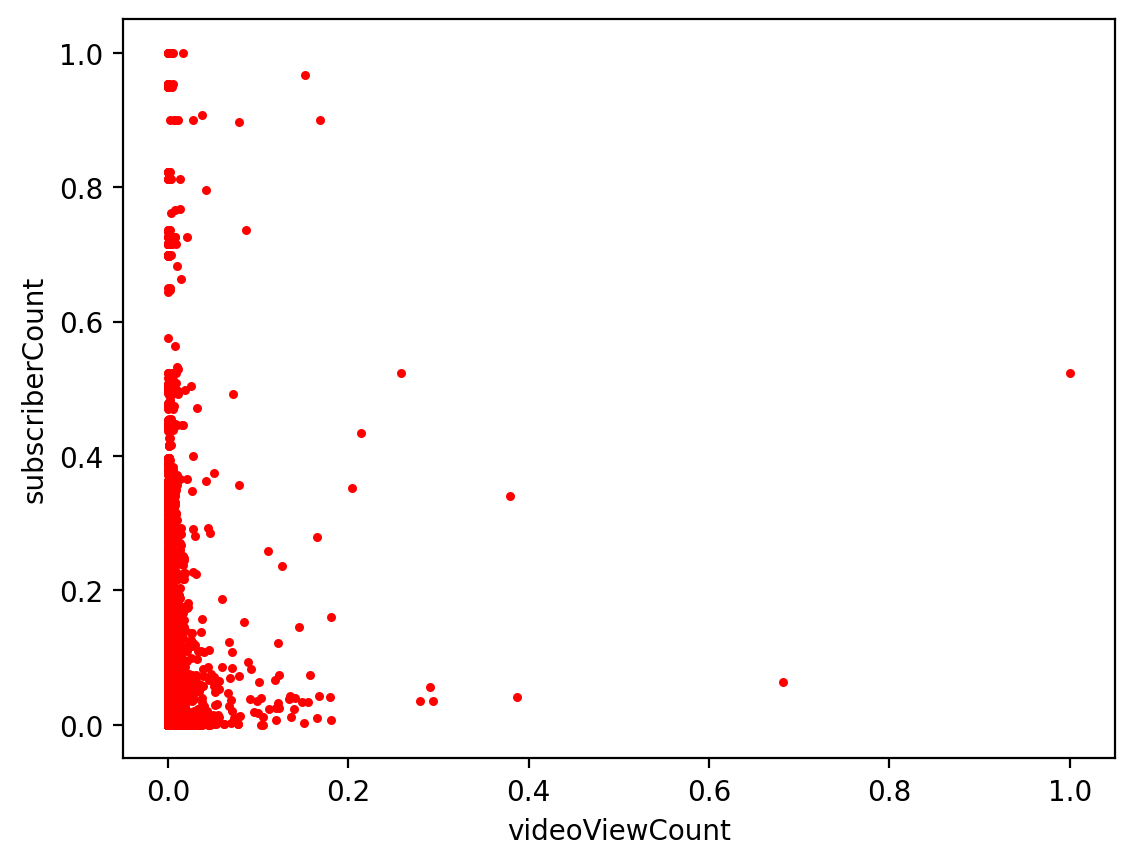

In [99]:
draw_scatter(data, 'videoViewCount', 'subscriberCount')